# Linear Regression and Temperature

In this notebook, we'll look at using linear regression to study changes in temperature.

## Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%config InlineBackend.figure_format ='retina'

## Getting our data

We'll be getting data from [North America Land Data Assimilation System (NLDAS)](https://wonder.cdc.gov/NASA-NLDAS.html), which provides the daily average temperature from 1979-2011 for the United States.

For the next step, you will need to choose some settings in the data request form. These are:

- GroupBy: Month Day, Year
- Your State
- Export Results (check box)
- Show Zero Values (check box)

>1) Download the data for your home state (or state of your choosing) and upload it to M2 in your work directory.

# Loading our data

In [ ]:
df = pd.read_csv('North America Land Data Assimilation System (NLDAS) Daily Air Temperatures and Heat Index (1979-2011).txt',delimiter='\t',skipfooter=14,engine='python')

In [ ]:
df

### Clean the data

>2) Drop any rows that have the value "Total" in the Notes column, then drop the Notes column

In [ ]:
df=df[df['Notes']!='Total']

>3) Make a column called Date that is in the pandas datetime format

In [40]:
df['Date'] = pd.to_datetime(df['Month Day, Year Code'])
df.head()

/tmp/ipykernel_12334/140420506.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Month Day, Year Code'])


,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Avg Daily Min Air Temperature (F),Date,Month,Day,Year,DateInt,color
0,NaN,"Jan 01, 1979",1979/01/01,44.57,28.76,1979-01-01,01,01,1979,2839968.0,#000000
1,NaN,"Jan 02, 1979",1979/01/02,49.24,32.15,1979-01-02,01,02,1979,2840832.0,#000000
2,NaN,"Jan 03, 1979",1979/01/03,52.43,36.84,1979-01-03,01,03,1979,2841696.0,#000000
3,NaN,"Jan 04, 1979",1979/01/04,52.30,39.37,1979-01-04,01,04,1979,2842560.0,#000000
4,NaN,"Jan 05, 1979",1979/01/05,47.61,38.49,1979-01-05,01,05,1979,2843424.0,#000000


>4) Make columns for 'Year', 'Month', and 'Day' by splitting the column 'Month Day, Year'

In [41]:
df[['Month','Day','Year']]=df['Month Day, Year'].str.split(pat = ' |, ', expand = True)
df.head()

/tmp/ipykernel_12334/2590756441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Month','Day','Year']]=df['Month Day, Year'].str.split(pat = ' |, ', expand = True)


,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Avg Daily Min Air Temperature (F),Date,Month,Day,Year,DateInt,color
0,NaN,"Jan 01, 1979",1979/01/01,44.57,28.76,1979-01-01,Jan,01,1979,2839968.0,#000000
1,NaN,"Jan 02, 1979",1979/01/02,49.24,32.15,1979-01-02,Jan,02,1979,2840832.0,#000000
2,NaN,"Jan 03, 1979",1979/01/03,52.43,36.84,1979-01-03,Jan,03,1979,2841696.0,#000000
3,NaN,"Jan 04, 1979",1979/01/04,52.30,39.37,1979-01-04,Jan,04,1979,2842560.0,#000000
4,NaN,"Jan 05, 1979",1979/01/05,47.61,38.49,1979-01-05,Jan,05,1979,2843424.0,#000000


In [42]:
df[['Year','Month','Day']]=df['Month Day, Year Code'].str.split(pat = '/', expand = True)
df.head()

/tmp/ipykernel_12334/615907029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Year','Month','Day']]=df['Month Day, Year Code'].str.split(pat = '/', expand = True)


,Notes,"Month Day, Year","Month Day, Year Code",Avg Daily Max Air Temperature (F),Avg Daily Min Air Temperature (F),Date,Month,Day,Year,DateInt,color
0,NaN,"Jan 01, 1979",1979/01/01,44.57,28.76,1979-01-01,01,01,1979,2839968.0,#000000
1,NaN,"Jan 02, 1979",1979/01/02,49.24,32.15,1979-01-02,01,02,1979,2840832.0,#000000
2,NaN,"Jan 03, 1979",1979/01/03,52.43,36.84,1979-01-03,01,03,1979,2841696.0,#000000
3,NaN,"Jan 04, 1979",1979/01/04,52.30,39.37,1979-01-04,01,04,1979,2842560.0,#000000
4,NaN,"Jan 05, 1979",1979/01/05,47.61,38.49,1979-01-05,01,05,1979,2843424.0,#000000


In [44]:
df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later

/tmp/ipykernel_12334/1970195628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateInt'] = df['Date'].astype(int)/10e10 # This will be used later


## Generating a scatter plot

> 4) Use df.plot.scatter to plot 'Date' vs 'Avg Daily Max Air Temperature (F)'. You might want to add figsize=(50,5) as an argument to make it more clear what is happening.

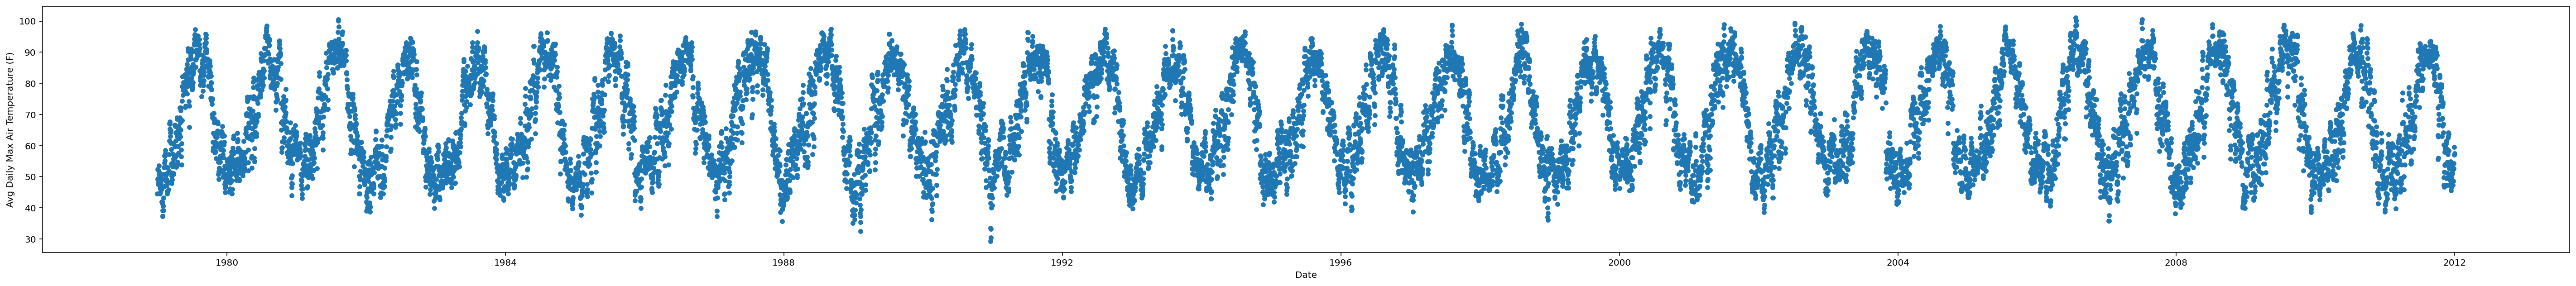

In [68]:
df.plot.scatter(x = 'Date', y = 'Avg Daily Max Air Temperature (F)', figsize=(50,5));

>5) Describe your plot.

The graph has an oscillating pattern that repeats annually. The average daily temp increases going toward summer and then 
decreases to a min going toward winter. This general pattern repeats every year

### Adding colors for our graph

In [46]:
len(df['Month'].unique())

12

In [48]:
# No need to edit this unless you want to try different colors or a pattern other than colors by month

cmap = matplotlib.cm.get_cmap("nipy_spectral", len(df['Month'].unique())) # Builds a discrete color mapping using a built in matplotlib color map

c = []
for i in range(cmap.N): # Converts our discrete map into Hex Values
    rgba = cmap(i)
    c.append(matplotlib.colors.rgb2hex(rgba))

df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row

/tmp/ipykernel_12334/2382980842.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['color']=[c[int(i-1)] for i in df['Month'].astype(int)] # Adds a column to our dataframe with the color we want for each row


>6) Make the same plot as 4) but add color by adding the argument c=df\['color'\] to our plotting command.

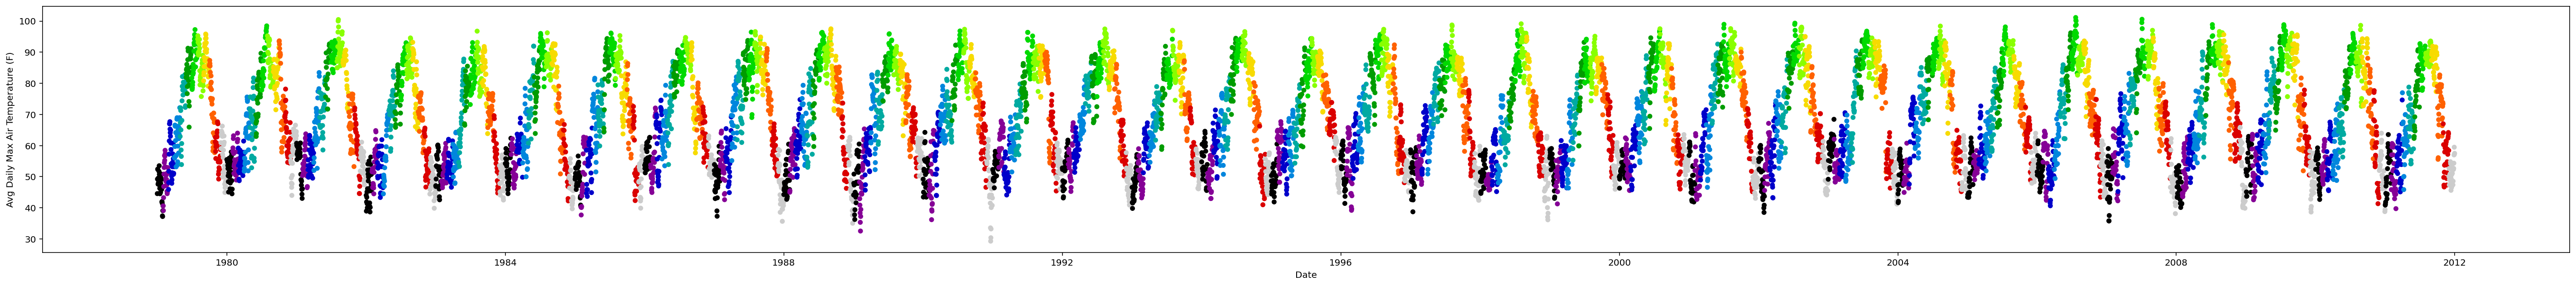

In [49]:
df.plot.scatter(x = 'Date', y = 'Avg Daily Max Air Temperature (F)', figsize=(50,5), c=df['color']);

## Pick a subset of the data

>7) Select a 6 month period from the data. # Hint use logic and pd.datetime(YYYY, MM, DD)

In [51]:
subset=df[(pd.datetime(2009,1,1)<=df['Date'])&(df['Date']<pd.datetime(2009,7,1))]

>8) Plot the subset using the the same code you used in 6). You can change the figsize if needed.

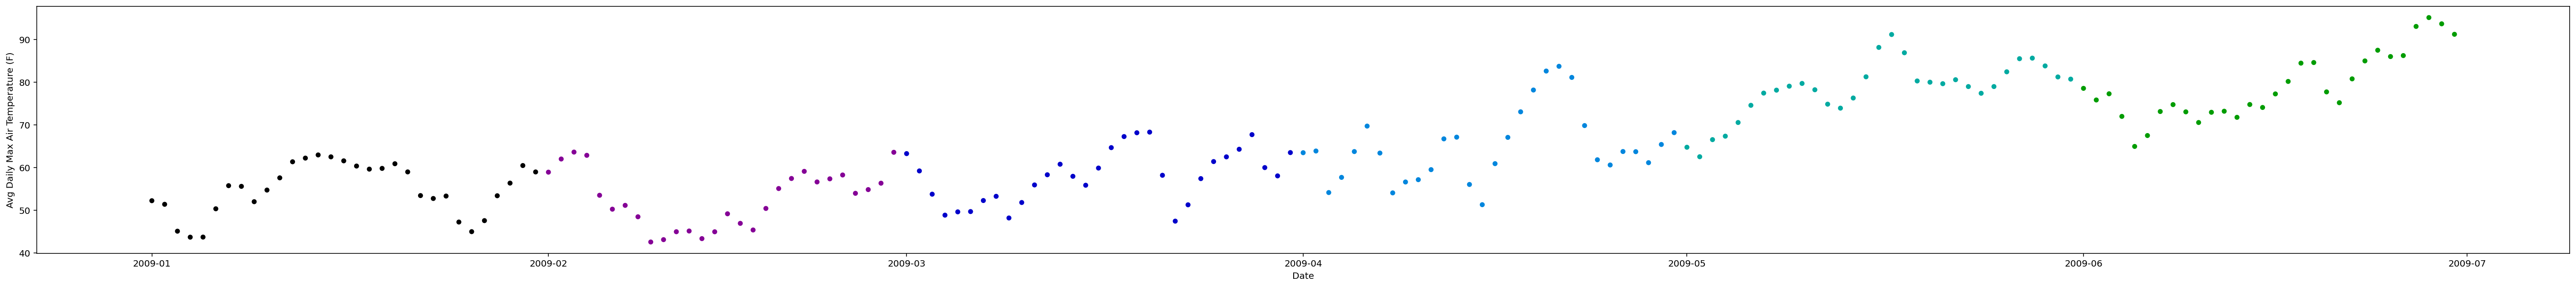

In [53]:
subset.plot.scatter(x = 'Date', y = 'Avg Daily Max Air Temperature (F)', figsize=(50,5), c=subset['color']);

## Linear Regression

We are going to use a very [simple linear regression model](https://en.wikipedia.org/wiki/Simple_linear_regression). You may implement a more complex model if you wish.

The method described here is called the least squares method and is defined as:

$m = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}))}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$

$b = \bar{y} - m\bar{x}$

Where $\bar{x}$ and $\bar{y}$ are the average value of $x$ and $y$ respectively.

First we need to define our X and Y values.

In [54]:
X=subset['DateInt'].values
Y=subset['Avg Daily Max Air Temperature (F)'].values

In [55]:
def lin_reg(x,y):
    # Calculate the average x and y
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    num = 0
    den = 0
    for i in range(len(x)): # This represents our sums
        num = num + (x[i] - x_avg)*(y[i] - y_avg) # Our numerator
        den = den + (x[i] - x_avg)**2 # Our denominator
    # Calculate slope
    m = num / den
    # Calculate intercept
    b = y_avg - m*x_avg

    print (m, b)
    
    # Calculate our predicted y values
    y_pred = m*x + b
    
    return y_pred

In [56]:
Y_pred = lin_reg(X,Y)

0.00022903641060869416 -2771.952909254649


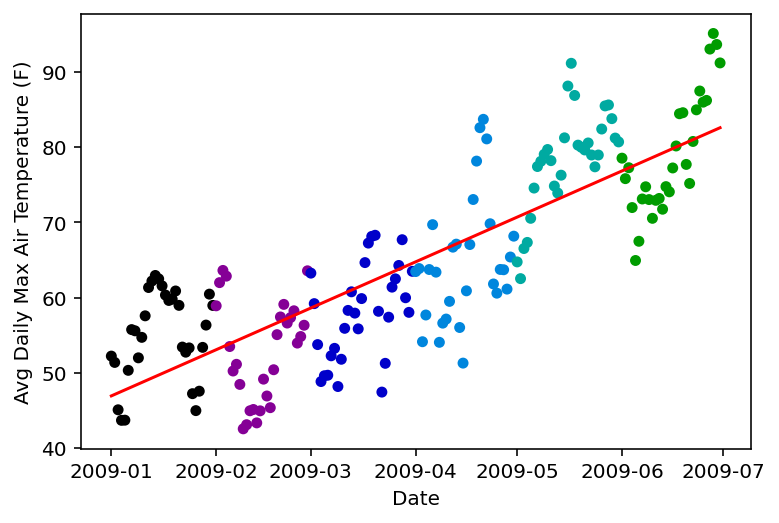

In [39]:
subset.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=subset['color'])
plt.plot([min(subset['Date'].values), max(subset['Date'].values)], [min(Y_pred), max(Y_pred)], color='red') # best fit line
plt.show()

>9) What are the slope and intercept of your best fit line?

The slope is 0.00022903641060869416 and the intercept is -2771.952909254649 .
These values are found by running the lin_reg function on (X,Y) because part of the function includes printing both the slope and the intercept of of the best fit line

>10) What are the minimum and maximum Y values of your best fit line? Is your slope positive or negative?

In [64]:
print('The min value of the best fit line is '+ str(min(Y_pred)))
print('The max value of the best fit line is '+ str(max(Y_pred)))

The min value of the best fit line is 46.9539408657638
The max value of the best fit line is 82.57368344362794


The slope is positive, as shown in the cells above.

## Putting it all together

>11) Generate a best fit line for the full data set and plot the line over top of the data.

In [65]:
Xtot=df['DateInt'].values
Ytot=df['Avg Daily Max Air Temperature (F)'].values
Y_pred2=lin_reg(Xtot,Ytot)

1.3842841004302256e-07 67.60597761859036


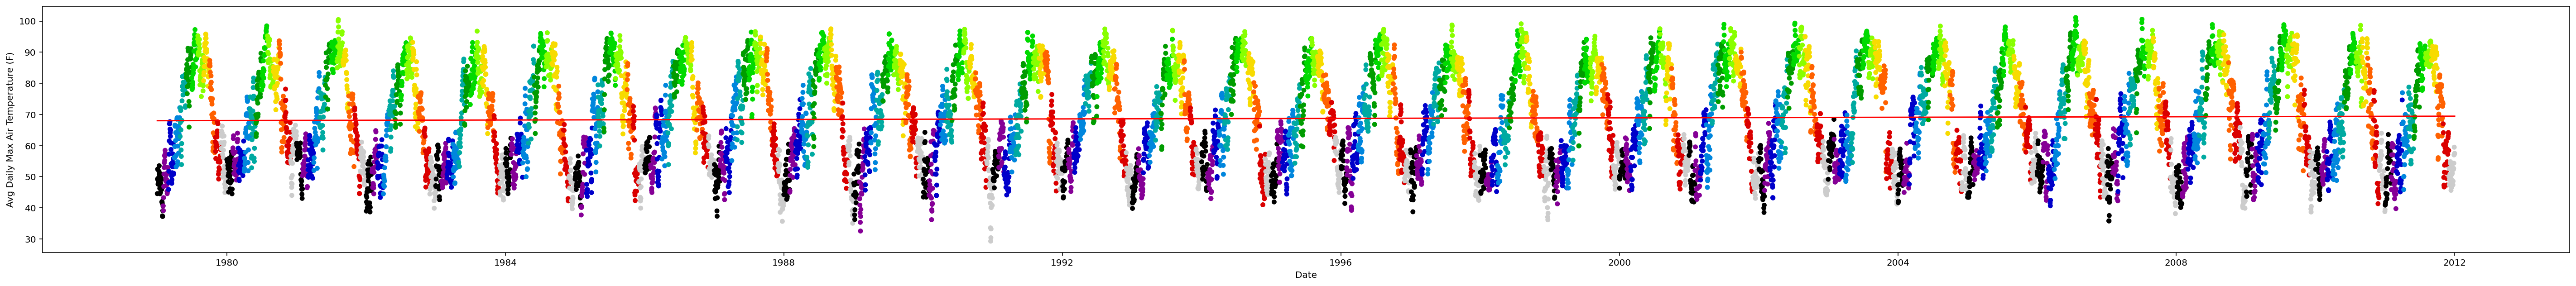

In [70]:
df.plot.scatter(x='Date', y='Avg Daily Max Air Temperature (F)',c=df['color'], figsize=(50,5))
plt.plot([min(df['Date'].values), max(df['Date'].values)], [min(Y_pred2), max(Y_pred2)], color='red') # best fit line
plt.show()

>12) Is the slope positive or negative? What do you think that means?

The slope is practically zero. Since the graph oscilates between relative max and min values, the best fit line will have a slope of zero because it is the closest between the relative max and min values.